In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from nltk import WordNetLemmatizer 
from nltk.corpus import wordnet 
from nltk import pos_tag 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score

#### Load Data

In [24]:
df = pd.read_csv('HR_Analytics.csv')
df['Gender'].value_counts()

Male      889
Female    591
Name: Gender, dtype: int64

#### Data Columns

In [25]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

#### Drop Column with NAs

In [5]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

#### One Hot Encode Target Variable

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['Gender'])
encoded_data
df['Gender'] = pd.DataFrame(encoded_data, columns = ['Gender'], index=df['Gender'].index)
df['Gender'].value_counts()

1    889
0    591
Name: Gender, dtype: int64

#### Balance Dataset

In [7]:
df['Gender'].value_counts()

1    889
0    591
Name: Gender, dtype: int64

In [8]:
ones = df[df.iloc[:,12] == 1]
zeros = df[df.iloc[:,12] == 0]
zeros

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
5,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,...,3,3,80,0,0,5,4,0,0,0
6,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,...,3,3,80,0,0,2,4,0,0,0
7,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,1,...,3,3,80,0,0,4,1,0,0,0
9,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,3,4,80,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,59,55+,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,4,80,1,30,3,3,3,2,2
1471,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,...,3,1,80,0,30,4,3,5,3,4
1473,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,...,3,4,80,0,13,2,3,6,1,0
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11


In [9]:
ones.iloc[:591,12].value_counts()

1    591
Name: Gender, dtype: int64

In [10]:
onesdf = ones.iloc[:591, :]
onesdf.shape

(591, 36)

In [11]:
zeros.shape

(591, 36)

In [12]:
df = pd.concat([onesdf,zeros], axis=0)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
8,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,...,3,4,80,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,59,55+,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,4,80,1,30,3,3,3,2,2
1471,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,...,3,1,80,0,30,4,3,5,3,4
1473,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,...,3,4,80,0,13,2,3,6,1,0
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11


#### Train Test Set

In [13]:
y = df['Gender']
X = df.drop(columns=['Gender'], axis=1)
X.head()
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: Gender, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
X_train

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
560,33,26-35,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,1,...,3,1,80,0,8,2,4,5,4,1
501,32,26-35,No,Travel_Rarely,495,Research & Development,10,3,Medical,1,...,4,2,80,0,10,5,4,5,2,0
365,30,26-35,Yes,Travel_Frequently,109,Research & Development,5,3,Medical,1,...,3,1,80,0,4,3,3,3,2,1
1048,41,36-45,No,Travel_Rarely,796,Sales,4,1,Marketing,1,...,3,4,80,1,23,3,4,22,14,13
902,38,36-45,No,Non-Travel,1336,Human Resources,2,3,Human Resources,1,...,3,4,80,3,13,3,3,11,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,43,36-45,No,Travel_Rarely,823,Research & Development,6,3,Medical,1,...,3,4,80,0,21,2,3,16,12,6
449,31,26-35,No,Travel_Rarely,1079,Sales,10,2,Medical,1,...,3,4,80,1,8,2,3,5,2,1
620,34,26-35,No,Travel_Frequently,135,Research & Development,19,3,Medical,1,...,3,3,80,2,15,2,4,11,8,5
920,39,36-45,No,Travel_Frequently,1218,Research & Development,1,1,Life Sciences,1,...,3,3,80,1,21,3,3,21,8,1


#### One Hot Encode Data

In [15]:
numbers = df[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]]
numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_validate

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[["AgeGroup","Attrition","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(),index=X_train.index)
X_train_ = pd.concat([numbers,X_train_onehot], axis = 1)
X_train_.dropna(inplace=True)
X_train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 1475
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                886 non-null    int64  
 1   DailyRate                          886 non-null    int64  
 2   DistanceFromHome                   886 non-null    int64  
 3   Education                          886 non-null    int64  
 4   EmployeeCount                      886 non-null    int64  
 5   EmployeeNumber                     886 non-null    int64  
 6   EnvironmentSatisfaction            886 non-null    int64  
 7   HourlyRate                         886 non-null    int64  
 8   JobInvolvement                     886 non-null    int64  
 9   JobLevel                           886 non-null    int64  
 10  JobSatisfaction                    886 non-null    int64  
 11  MonthlyIncome                      886 non-null    int64 

#### Transform Test Object Variables

In [16]:
test_dummies = ohe.transform(X_test[["AgeGroup","Attrition","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])

test_ = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names_out(),
                    index=X_test.index)
X_test_ = pd.concat([X_test[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]], test_], axis=1)
X_test_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
586,34,1354,5,3,1,153,3,45,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
573,33,867,8,4,1,1798,4,90,4,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
302,29,337,14,1,1,1421,3,84,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
708,35,660,7,1,1,1492,4,76,3,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
835,37,1252,19,2,1,904,1,32,3,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,40,692,11,3,1,1985,4,73,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
592,34,1362,19,3,1,502,1,67,4,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
387,30,945,9,3,1,1876,2,89,3,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
170,27,472,1,1,1,274,3,60,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### First Simple Model - Random Forest Classifier

In [17]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

#### Metrics

In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
y_hat_train = forest.predict(X_train_)
y_hat_test = forest.predict(X_test_)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.7443478260869565
Testing Precision:  0.5



Training Recall:  0.9427312775330396
Testing Recall:  0.6861313868613139



Training Accuracy:  0.8047404063205418
Testing Accuracy:  0.5371621621621622



Training F1-Score:  0.8318756073858115
Testing F1-Score:  0.5784615384615385


#### Model Summary

- The precision, Recall, Accuracy, and F1-Score for the training data is all above 0.74. The highest score is the Recall at 0.96. These scores are strong, however, the scores for the test data are lower. The highest Recall score is 0.68. The lowest score is the precision at 0.49

#### Classification Report

In [20]:
y_pred = forest.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       432
           1       0.74      0.94      0.83       454

    accuracy                           0.80       886
   macro avg       0.83      0.80      0.80       886
weighted avg       0.83      0.80      0.80       886




In [21]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.41      0.49       159
           1       0.50      0.69      0.58       137

    accuracy                           0.54       296
   macro avg       0.55      0.55      0.53       296
weighted avg       0.55      0.54      0.53       296




#### Roc Curve

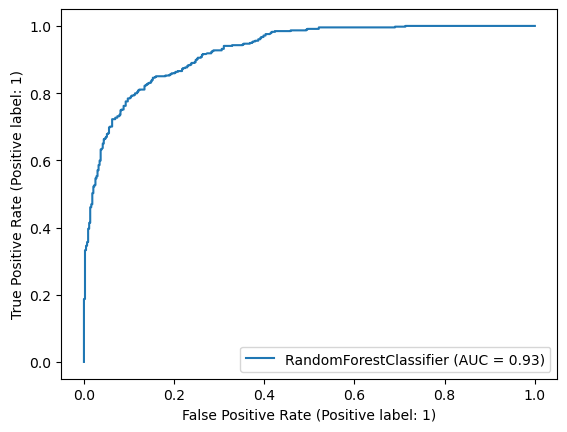

In [22]:
RocCurveDisplay.from_estimator(forest, X_train_, y_train);